In [3]:
import pandas as pd
data_2019 = pd.read_csv(r'C:\Users\RONALD\Desktop\Python Code\Practise\Projects\Clustering\World Happiness 2019.csv')

In [4]:
data_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
data = data_2019.drop(['Overall rank', 'Country or region'], axis=1)
data.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7)
memory usage: 8.6 KB


In [11]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Step 2: extract the measurement from the dataframe

In [12]:
samples = data.values
samples

array([[7.769, 1.34 , 1.587, ..., 0.596, 0.153, 0.393],
       [7.6  , 1.383, 1.573, ..., 0.592, 0.252, 0.41 ],
       [7.554, 1.488, 1.582, ..., 0.603, 0.271, 0.341],
       ...,
       [3.203, 0.35 , 0.517, ..., 0.   , 0.158, 0.025],
       [3.083, 0.026, 0.   , ..., 0.225, 0.235, 0.035],
       [2.853, 0.306, 0.575, ..., 0.01 , 0.202, 0.091]])

#### Step 3: Distance between data points

In [22]:
from sklearn.cluster import KMeans

ks = range(1, 10)
SSE = []

for k in ks:
    
    model = KMeans(n_clusters=k)
    
    model.fit(samples)
    
    SSE.append(model.inertia_)

In [23]:
SSE

[245.5869934102564,
 90.96037391184754,
 55.323514606060606,
 40.343168418852756,
 29.874455852139036,
 26.20786952355205,
 24.22234329261523,
 22.30515922934418,
 20.937157516117214]

#### Elbow Method:

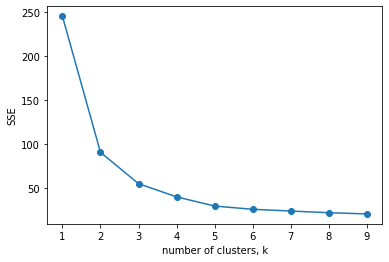

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ks, SSE,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [25]:
model2 = KMeans(n_clusters=3)

In [26]:
labels = model2.fit_predict(samples)

data['labels'] = labels

In [27]:
model2.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [28]:
model2.cluster_centers_

array([[5.71904545, 1.02883333, 1.334     , 0.81669697, 0.40415152,
        0.15771212, 0.07340909],
       [4.26911667, 0.53678333, 0.9356    , 0.49706667, 0.32121667,
        0.18978333, 0.09396667],
       [6.99676667, 1.36976667, 1.47983333, 0.9804    , 0.5098    ,
        0.23466667, 0.2257    ]])

In [29]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,labels
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [30]:
data.labels.value_counts()

0    66
1    60
2    30
Name: labels, dtype: int64

In [42]:
X = data_2019[['Overall rank']]
Y = data_2019[['Country or region']]
XY = pd.concat([X,Y], axis=1)


In [39]:
data = pd.concat([XY, data], axis=1)

In [40]:
import os
os.chdir(r'C:\......\Python Code\Practise\Projects\Clustering')

In [41]:
data.to_excel("WH2019_output.xlsx", index=False, sheet_name="Final output")